<a href="https://colab.research.google.com/github/neel26desai/basic_neural_networks/blob/main/neural_nw_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Synthetics Data Generation

In [2]:
# defining the data
n,d = 100,3 # 100 records 3 features
#creating x, values will be between -1 and 1 and the shabe will be n,d
x = np.random.uniform(-1, 1, (n, d))
#creating weights that allows us to ge the y_true values
weights_true = np.array([[5,3,1],]).T
bias_true = np.array([1])

#creating a euqation for out y_true
y_true = (x**3) @ weights_true + (x**2) @ weights_true + x @ weights_true +bias_true
#TODO : adding the tensorflow implementation for  matrix multiplication
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')



x: (100, 3), weights: (3, 1), bias: (1,), y: (100, 1)


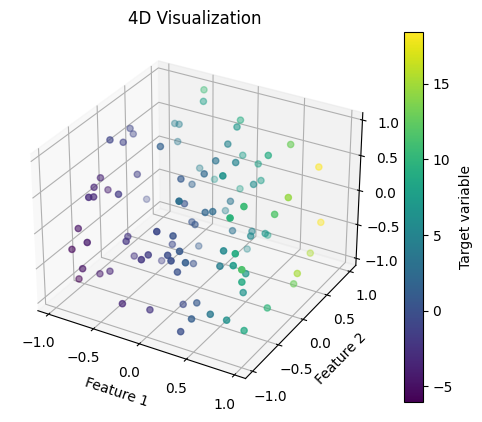

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#defining function for visualizaing the data
def visualize_4d_data(x, y_true):
    """
    Visualizes 4D data using a 3D scatter plot with color representing the fourth dimension.

    Args:
    x (numpy.ndarray): Input features with shape (n, 3).
    y_true (numpy.ndarray): Target variable with shape (n, 1).
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true.ravel(), cmap='viridis')
    plt.colorbar(scatter, label='Target variable')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title('4D Visualization')
    plt.show()

# Example usage
visualize_4d_data(x, y_true)

# Fowards Propogation

We'll be writing only the code needed for forward propogation

## Figuring out matrix multiplication

In [4]:
np.dot(x[:3], weights_true)

array([[-0.75989016],
       [-4.05632002],
       [ 1.07263503]])

In [5]:
a = tf.einsum('ij,jk->ik', x[:3], weights_true)
print(type(a))
a

<class 'tensorflow.python.framework.ops.EagerTensor'>


<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[-0.75989016],
       [-4.05632002],
       [ 1.07263503]])>

In [6]:
# the above code returned a tensor object we need to convert it to numpy
a.numpy()

array([[-0.75989016],
       [-4.05632002],
       [ 1.07263503]])

## Forward Prop

In [7]:
#writinbg base cases necessary for foward propogation
class LinearLayer:
  '''
  Instane of this class will be used for creating layers
  '''
  def __init__(self,input_dim, output_dim):
    self.input_dim = input_dim
    self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2 / input_dim)
    self.bias = np.zeros(output_dim)

  def __call__(self, x):
    #using tensorflows enim
    #np.dot(x, self.weights)
    return tf.einsum('ij,jk->ik', x, self.weights).numpy() + self.bias

  def backward(self, x, grad_output):
    pass

class ReLu:
  def __call__(self, x):
    self.x = x
    return np.maximum(0, self.x)

  def backward(self, x, grad_output):
    pass

class NeuralNetwork:
  def __init__(self, input_dim, hidden_dim, output_dim):
    #simple one hidden layer architecture for testing the
    self.layers = [
      LinearLayer(input_dim, hidden_dim),
      ReLu(),
      LinearLayer(hidden_dim, output_dim)
    ]

  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

In [8]:
model = NeuralNetwork(input_dim=3, hidden_dim=3, output_dim=1)
y_pred = model.forward(x)
assert y_pred.shape == y_true.shape, "Shape of y_pred and y_true should be the same"

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_function_and_predictions_4d(x, y_true, y_pred, output_dim=0, cmap='viridis'):
    """
    Plots the underlying function and the predicted function for a specific output dimension, with the fourth dimension represented by color.

    Args:
    x (numpy.ndarray): Input features with shape (n, 3).
    y_true (numpy.ndarray): True target values with shape (n, 2).
    y_pred (numpy.ndarray): Predicted target values with shape (n, 2).
    output_dim (int): The output dimension to visualize (0 or 1).
    cmap (str): Color map to use for the fourth dimension.
    """
    fig = plt.figure(figsize=(12, 6))

    # Define the color map for the fourth dimension
    norm = plt.Normalize(vmin=min(x[:, 2]), vmax=max(x[:, 2]))
    colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))

    # Plot the true values
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x[:, 0], x[:, 1], y_true[:, output_dim], c=colors, marker='o', label='True')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel(f'Y{output_dim + 1}')
    ax1.set_title('Underlying Function')

    # Plot the predicted values
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x[:, 0], x[:, 1], y_pred[:, output_dim], c=colors, marker='^', label='Predicted')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel(f'Y{output_dim + 1}')
    ax2.set_title('Predicted Function')

    # Add a color bar to indicate the fourth dimension
    mappable = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    mappable.set_array(x[:, 2])
    plt.colorbar(mappable, ax=[ax1, ax2], label='X3 (Fourth Dimension)')

    plt.legend()
    plt.show()


<ipython-input-9-8a3f599c504e>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))


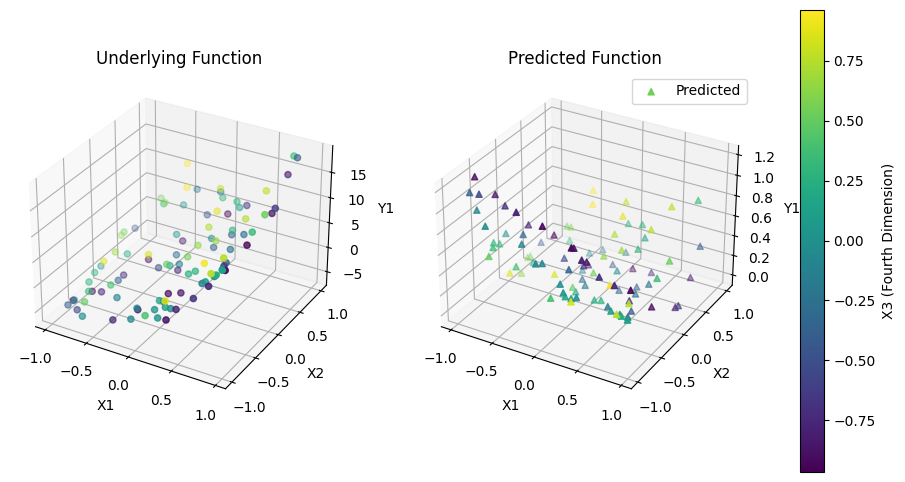

In [10]:
plot_function_and_predictions_4d(x, y_true, y_pred, output_dim=0)

#Cost Function -  MSE

Integrating Cost function  cauclation at the end of forward propogation

In [11]:
x.shape

(100, 3)

In [12]:
from re import S
class MSELoss:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return np.mean((y_pred - y_true) ** 2)

    def backward(self):
        return 2 * (self.y_pred - self.y_true) / self.y_true.size

class LinearLayer:
  '''
  Instane of this class will be used for creating layers
  '''
  def __init__(self,input_dim, output_dim):
    self.input_dim = input_dim
    self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2 / input_dim)
    self.bias = np.zeros(output_dim)

  def __call__(self, x):
    return tf.einsum('ij,jk->ik', x, self.weights).numpy() + self.bias

  def backward(self, x, grad_output):
    pass

class ReLu:
  def __int_(self):
    self.x = None

  def __call__(self, x):
    self.x = x
    return np.maximum(0, x)

  def backward(self, x, grad_output):
    pass

class NeuralNetwork:
  def __init__(self, input_dim, hidden_dim, output_dim):
    self.layers = [
      LinearLayer(input_dim, hidden_dim),
      ReLu(),
      LinearLayer(hidden_dim, output_dim)
    ]
    self.loss = MSELoss()

  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def compute_loss(self, y_pred, y_true):
    return self.loss.forward(y_pred, y_true)

In [13]:
model = NeuralNetwork(input_dim=3, hidden_dim=3, output_dim=1)
y_pred = model.forward(x)
#compute loss
loss = model.compute_loss(y_pred, y_true)

In [14]:
loss

43.94899802627157

# Backrpop
Integrating forward prop, , loss calculation , back prop with graident descent. An d training logic with number of epochs.

In [15]:
import numpy as np
import tensorflow as tf

class MSELoss:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return np.mean((y_pred - y_true) ** 2)

    def backward(self):
        return 2 * (self.y_pred - self.y_true) / self.y_true.size


class ReLu:
    def __init__(self):
        self.x = None

    def __call__(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, grad_output):
        grad_input = grad_output * (self.x > 0)
        return grad_input


class LinearLayer:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2 / input_dim)
        self.bias = np.zeros(output_dim)

    def __call__(self, x):
        self.x = x
        return tf.einsum('ij,jk->ik', x, self.weights).numpy() + self.bias

    def backward(self, grad_output):
        grad_input = tf.einsum('ij,kj->ik', grad_output, self.weights).numpy()
        grad_weights = tf.einsum('ki,kj->ij', self.x, grad_output).numpy()
        grad_bias = np.sum(grad_output, axis=0)
        return grad_input, grad_weights, grad_bias

    def update(self, lr, grad_weights, grad_bias):
        self.weights -= lr * grad_weights
        self.bias -= lr * grad_bias


class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.layers = [
            LinearLayer(input_dim, hidden_dim),
            ReLu(),
            LinearLayer(hidden_dim, hidden_dim),
            ReLu(),
            LinearLayer(hidden_dim, output_dim)
        ]
        self.loss = MSELoss()

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def backward(self, grad_output):
        for layer in reversed(self.layers):
            if isinstance(layer, LinearLayer):
                grad_output, grad_weights, grad_bias = layer.backward(grad_output)
                layer.grad_weights = grad_weights
                layer.grad_bias = grad_bias
            elif isinstance(layer, ReLu):
                grad_output = layer.backward(grad_output)
        return grad_output

    def update(self, lr):
        for layer in self.layers:
            if isinstance(layer, LinearLayer):
                layer.update(lr, layer.grad_weights, layer.grad_bias)


def fit(x: np.ndarray, y: np.ndarray, model: NeuralNetwork, loss: MSELoss, lr: float, num_epochs: int):
    loss_history = []
    for epoch in range(num_epochs):
        y_pred = model(x)
        loss_value = loss.forward(y_pred, y)
        loss_history.append(loss_value)
        print(f'Epoch {epoch + 1}, loss {loss_value}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)
    return loss_history


In [16]:

# Create a neural network model
nn = NeuralNetwork(input_dim=3, hidden_dim=3, output_dim=1)

# Define the loss
loss = MSELoss()

# Fit the model
loss_history = fit(x, y_true, model=nn, loss=loss, lr=0.01, num_epochs=100)


Epoch 1, loss 48.849801586040876
Epoch 2, loss 44.407507432187096
Epoch 3, loss 41.47718791405042
Epoch 4, loss 40.11091105736689
Epoch 5, loss 39.124495118538114
Epoch 6, loss 38.15710379284939
Epoch 7, loss 37.14157771139081
Epoch 8, loss 36.04650200069207
Epoch 9, loss 34.84877823072279
Epoch 10, loss 33.51402235351734
Epoch 11, loss 32.00570943384277
Epoch 12, loss 30.301751216401755
Epoch 13, loss 28.39024662783916
Epoch 14, loss 26.272997003002143
Epoch 15, loss 23.958673788882596
Epoch 16, loss 21.494000821496883
Epoch 17, loss 18.98411519092575
Epoch 18, loss 16.544953218133237
Epoch 19, loss 14.379948576539592
Epoch 20, loss 12.598655925767519
Epoch 21, loss 11.264274976185737
Epoch 22, loss 10.337232929229684
Epoch 23, loss 9.694816641449881
Epoch 24, loss 9.22581902349659
Epoch 25, loss 8.860664500103669
Epoch 26, loss 8.546506535940285
Epoch 27, loss 8.258953540367521
Epoch 28, loss 7.9976852205248345
Epoch 29, loss 7.746559437164239
Epoch 30, loss 7.521561739372998
Epoch 3

<ipython-input-9-8a3f599c504e>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap)(norm(x[:, 2]))


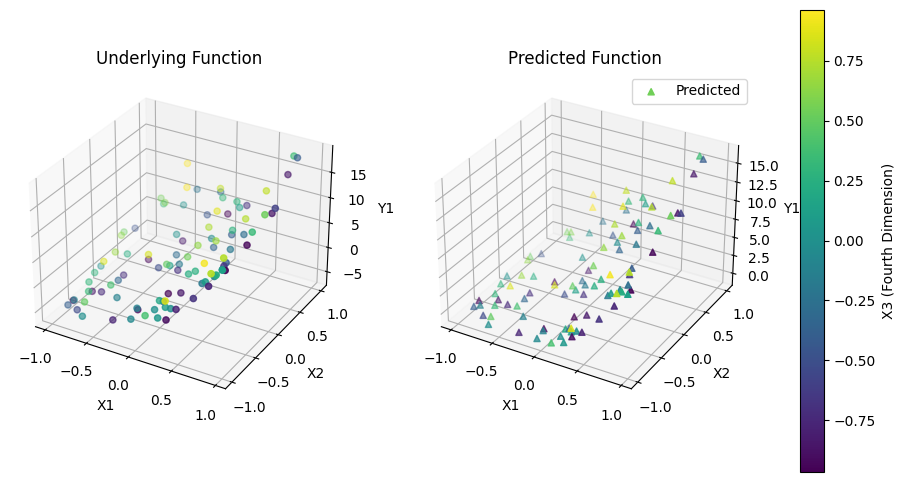

In [17]:
#plotting the difference between real distribution and predicted distribution
y_pred = nn(x)
plot_function_and_predictions_4d(x, y_true, y_pred, output_dim=0)

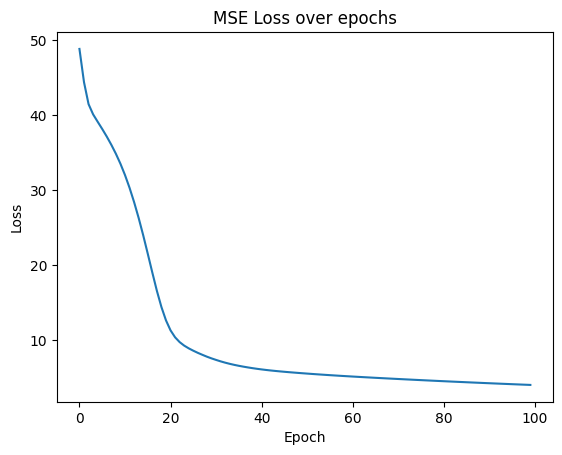

In [18]:
#plot the mse value over each epoch
plt.plot(loss_history)
plt.title('MSE Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()